# Canary Quant

### Import libraries

In [202]:
import alpaca_trade_api as tradeapi
import numpy as np
import pandas as pd
from datetime import date
from CanaryFinancialCalculations import CanaryFinancialCalculations 
import hvplot.pandas
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from bokeh.models.formatters import DatetimeTickFormatter
import plotly.express as px

In [203]:
warnings.filterwarnings('ignore')

### Initiate variables to pull data from Alpaca

In [204]:
alpaca_api_key = 'PK306FA7SFOSMY9LBUZ4'
alpaca_secret_key = 'oNujbWMi3ZLrZuVggRN1DnZBLs38EJO00cwyOgsE'
base_url = 'https://paper-api.alpaca.markets'

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url,
    api_version="v2")

tickers = ["TSLA", "AAPL", "AMD", "GOOGL"]
benchmark= ["SPY", "QQQ", "PSI", "IGM"]
timeframe = '1Day'
initial_investment = 10000
weights = [(1 / len(tickers))] * len(tickers)
weights_benchmark = [(1 / len(benchmark))] * len(benchmark)

start_date = pd.Timestamp("2018-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-11-01", tz="America/New_York").isoformat()


## User Portfolio

### Use the functions provided in CanaryFinancialCalculations.py to create the user's portfolio

In [205]:
portfolio_df = CanaryFinancialCalculations.portfolio_df(tickers, start_date, end_date, timeframe, alpaca)
portfolio_df

symbol,AAPL,AMD,GOOGL,TSLA
Date,,,,
2018-01-02,40.67,10.98,53.66,21.37
2018-01-03,40.66,11.55,54.58,21.15
2018-01-04,40.85,12.12,54.79,20.97
2018-01-05,41.31,11.88,55.51,21.11
2018-01-08,41.16,12.28,55.71,22.43
...,...,...,...,...
2023-10-26,166.68,93.67,122.28,205.76
2023-10-27,168.00,96.43,122.17,207.30
2023-10-30,170.07,96.18,124.46,197.36


In [206]:
weighted_portfolio_df = CanaryFinancialCalculations.weighted_df(portfolio_df, weights)
weighted_portfolio_df

,Portfolio
Date,
2018-01-02,31.6700
2018-01-03,31.9850
2018-01-04,32.1825
2018-01-05,32.4525
2018-01-08,32.8950
...,...
2023-10-26,147.0975
2023-10-27,148.4750
2023-10-30,147.0175


In [207]:
user_portfolio_pct_chg = CanaryFinancialCalculations.portfolio_pct_chg(portfolio_df, weights)
user_portfolio_pct_chg

,Portfolio
Date,
2018-01-03,0.014629
2018-01-04,0.012340
2018-01-05,0.002819
2018-01-08,0.024043
2018-01-09,-0.011746
...,...
2023-10-26,-0.026818
2023-10-27,0.010992
2023-10-30,-0.004869


## Benchmark Dataframe

### Use functions to create dataframe for benchmark stocks

In [208]:
benchmark_df = CanaryFinancialCalculations.portfolio_df(benchmark, start_date, end_date, timeframe, alpaca)
benchmark_df

symbol,IGM,PSI,QQQ,SPY
Date,,,,
2018-01-02,166.9700,16.80,151.79,244.98
2018-01-03,169.0200,17.06,153.26,246.53
2018-01-04,169.8800,17.18,153.53,247.53
2018-01-05,171.7100,17.31,155.07,249.20
2018-01-08,172.8200,17.46,155.68,249.66
...,...,...,...,...
2023-10-26,365.8600,38.59,343.66,412.55
2023-10-27,367.2562,38.72,345.31,410.68
2023-10-30,371.2100,37.92,349.20,415.59


In [209]:
benchmark_pct_change = CanaryFinancialCalculations.benchmark_pct_chg(benchmark_df)
benchmark_pct_change

symbol,IGM,PSI,QQQ,SPY
Date,,,,
2018-01-03,0.012278,0.015476,0.009684,0.006327
2018-01-04,0.005088,0.007034,0.001762,0.004056
2018-01-05,0.010772,0.007567,0.010031,0.006747
2018-01-08,0.006464,0.008666,0.003934,0.001846
2018-01-09,-0.002430,-0.013746,0.000064,0.002283
...,...,...,...,...
2023-10-26,-0.017562,-0.003357,-0.019067,-0.011975
2023-10-27,0.003816,0.003369,0.004801,-0.004533
2023-10-30,0.010766,-0.020661,0.011265,0.011956


## Combining Portfolio and SPY

### Concatinate the portfolio with the benchmark stocks for comparison

In [210]:
comparing_portfolios_pct_chg = CanaryFinancialCalculations.pct_change_comparison(user_portfolio_pct_chg, benchmark_pct_change)
comparing_portfolios_pct_chg

,Portfolio,IGM,PSI,QQQ,SPY
Date,,,,,
2018-01-03,0.014629,0.012278,0.015476,0.009684,0.006327
2018-01-04,0.012340,0.005088,0.007034,0.001762,0.004056
2018-01-05,0.002819,0.010772,0.007567,0.010031,0.006747
2018-01-08,0.024043,0.006464,0.008666,0.003934,0.001846
2018-01-09,-0.011746,-0.002430,-0.013746,0.000064,0.002283
...,...,...,...,...,...
2023-10-26,-0.026818,-0.017562,-0.003357,-0.019067,-0.011975
2023-10-27,0.010992,0.003816,0.003369,0.004801,-0.004533
2023-10-30,-0.004869,0.010766,-0.020661,0.011265,0.011956


# Calculations

## Cumulative Returns

In [211]:
user_cumulative_returns = CanaryFinancialCalculations.cumulative_returns(user_portfolio_pct_chg, initial_investment)
user_cumulative_returns

,Profit
Date,
2018-01-03,10146.29
2018-01-04,10271.50
2018-01-05,10300.45
2018-01-08,10548.11
2018-01-09,10424.21
...,...
2023-10-26,70118.34
2023-10-27,70889.11
2023-10-30,70543.94


In [212]:
spy_returns = CanaryFinancialCalculations.cumulative_returns_benchmark(comparing_portfolios_pct_chg, initial_investment, "SPY")
spy_returns

,SPY
Date,
2018-01-03,10063.27
2018-01-04,10104.09
2018-01-05,10172.26
2018-01-08,10191.04
2018-01-09,10214.30
...,...
2023-10-26,16840.15
2023-10-27,16763.82
2023-10-30,16964.24


In [213]:
igm_returns = CanaryFinancialCalculations.cumulative_returns_benchmark(comparing_portfolios_pct_chg, initial_investment, "IGM")
igm_returns

,IGM
Date,
2018-01-03,10122.78
2018-01-04,10174.28
2018-01-05,10283.88
2018-01-08,10350.36
2018-01-09,10325.21
...,...
2023-10-26,21911.72
2023-10-27,21995.34
2023-10-30,22232.14


In [214]:
psi_returns = CanaryFinancialCalculations.cumulative_returns_benchmark(comparing_portfolios_pct_chg, initial_investment, "PSI")
psi_returns

,PSI
Date,
2018-01-03,10154.76
2018-01-04,10226.19
2018-01-05,10303.57
2018-01-08,10392.86
2018-01-09,10250.00
...,...
2023-10-26,22970.24
2023-10-27,23047.62
2023-10-30,22571.43


In [215]:
qqq_returns = CanaryFinancialCalculations.cumulative_returns_benchmark(comparing_portfolios_pct_chg, initial_investment, "QQQ")
qqq_returns

,QQQ
Date,
2018-01-03,10096.84
2018-01-04,10114.63
2018-01-05,10216.09
2018-01-08,10256.28
2018-01-09,10256.93
...,...
2023-10-26,22640.49
2023-10-27,22749.19
2023-10-30,23005.47


## Correlation

In [216]:
user_rolling_correlation = CanaryFinancialCalculations.rolling_correlation(comparing_portfolios_pct_chg)
user_rolling_correlation

Portfolio   IGM   PSI   QQQ   SPY
Date                                                   
2018-01-17 Portfolio       1.00  0.64  0.74  0.45  0.33
           IGM             0.64  1.00  0.89  0.96  0.88
           PSI             0.74  0.89  1.00  0.80  0.71
           QQQ             0.45  0.96  0.80  1.00  0.93
           SPY             0.33  0.88  0.71  0.93  1.00
...                         ...   ...   ...   ...   ...
2023-11-01 Portfolio       1.00  0.90  0.86  0.92  0.81
           IGM             0.90  1.00  0.67  0.98  0.91
           PSI             0.86  0.67  1.00  0.67  0.57
           QQQ             0.92  0.98  0.67  1.00  0.93
           SPY             0.81  0.91  0.57  0.93  1.00

[7295 rows x 5 columns]

In [217]:
user_correlation = CanaryFinancialCalculations.correlation(comparing_portfolios_pct_chg)
user_correlation

,Portfolio,IGM,PSI,QQQ,SPY
Portfolio,1.00,0.87,0.80,0.89,0.80
IGM,0.87,1.00,0.87,0.99,0.92
PSI,0.80,0.87,1.00,0.86,0.82
QQQ,0.89,0.99,0.86,1.00,0.93
SPY,0.80,0.92,0.82,0.93,1.00


## Covariance

In [218]:
user_covariance = CanaryFinancialCalculations.covariance(comparing_portfolios_pct_chg, "Portfolio", "SPY")
user_covariance

Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2023-10-26    0.000143
2023-10-27    0.000131
2023-10-30    0.000131
2023-10-31    0.000136
2023-11-01    0.000149
Length: 1468, dtype: float64

## Variance

In [219]:
user_variance = CanaryFinancialCalculations.variance(comparing_portfolios_pct_chg, "SPY")
user_variance

Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2023-10-26    0.000072
2023-10-27    0.000069
2023-10-30    0.000079
2023-10-31    0.000081
2023-11-01    0.000079
Name: SPY, Length: 1468, dtype: float64

## Beta

In [220]:
user_beta = CanaryFinancialCalculations.beta(user_covariance, user_variance)
user_beta

,Beta
Date,
2018-02-01,1.066304
2018-02-02,1.482470
2018-02-05,1.225184
2018-02-06,1.202182
2018-02-07,1.180657
...,...
2023-10-26,1.986899
2023-10-27,1.891297
2023-10-30,1.663414


In [221]:
user_avg_beta = CanaryFinancialCalculations.avg_beta(user_beta)
print(f'The average beta of your portfolio is {user_avg_beta[0]}')

The average beta of your portfolio is 1.55


## Drawdown

In [222]:
user_daily_drawdown = CanaryFinancialCalculations.daily_drawdown(weighted_portfolio_df)
user_daily_drawdown

,Portfolio
Date,
2018-01-02,0.00
2018-01-03,0.98
2018-01-04,1.59
2018-01-05,2.41
2018-01-08,3.72
...,...
2023-10-26,86.68
2023-10-27,86.68
2023-10-30,86.68


## Compounded Annual Growth Rate

In [223]:
user_annual_returns = CanaryFinancialCalculations.annual_return(weighted_portfolio_df, 'Portfolio')
print(f'The compounded annual growth rate of your portfolio is {user_annual_returns}% ')

The compounded annual growth rate of your portfolio is 37.11% 


In [224]:
benchmark_annual_return = CanaryFinancialCalculations.annual_return(benchmark_df, 'SPY')
print(f'The compounded annual growth rate of SPY is {benchmark_annual_return}%')

The compounded annual growth rate of SPY is 11.52%


## Tracking Error

In [225]:
user_tracking_error = CanaryFinancialCalculations.tracking_error(user_annual_returns, benchmark_annual_return)
print(f'The tracking error of your portfolio compared to SPY is {user_tracking_error}% CAGR')

The tracking error of your portfolio compared to SPY is 25.59% CAGR


## Sharpe Ratio

In [226]:
user_sharpe_ratio = CanaryFinancialCalculations.sharpe_ratio(user_portfolio_pct_chg)
print(f'The sharpe ratio of your portfolio is {user_sharpe_ratio[0]}')

The sharpe ratio of your portfolio is 1.13


## Return on Investment

In [227]:
user_roi = CanaryFinancialCalculations.return_on_investment(user_cumulative_returns, 'Profit', initial_investment)
print(f'The return on investment for your portfolio is {user_roi}%')

The return on investment for your portfolio is 641.04%


In [228]:
spy_roi = CanaryFinancialCalculations.return_on_investment(spy_returns, 'SPY', initial_investment)
print(f'The return on investment for SPY would have been {spy_roi}%')

The return on investment for SPY would have been 72.53%


In [229]:
igm_roi = CanaryFinancialCalculations.return_on_investment(igm_returns, 'IGM', initial_investment)
print(f'The return on investment for IGM would have been {igm_roi}%')

The return on investment for IGM would have been 127.95%


In [230]:
psi_roi = CanaryFinancialCalculations.return_on_investment(psi_returns, 'PSI', initial_investment)
print(f'The return on investment for PSI would have been {psi_roi}%')

The return on investment for PSI would have been 129.76%


In [231]:
qqq_roi = CanaryFinancialCalculations.return_on_investment(qqq_returns, 'QQQ', initial_investment)
print(f'The return on investment for QQQ would have been {qqq_roi}%')

The return on investment for QQQ would have been 135.17%


In [232]:
compared_roi = CanaryFinancialCalculations.roi_comparison(user_roi, spy_roi, igm_roi, psi_roi, qqq_roi)
compared_roi

,Compared,Percentage
0,Portfolio,641.04
1,SPY,72.53
2,IGM,127.95
3,PSI,129.76
4,QQQ,135.17


## Standard Deviation

In [233]:
user_rolling_std = CanaryFinancialCalculations.standard_deviation(user_portfolio_pct_chg)
user_rolling_std

,Portfolio
Date,
2018-02-01,12.13
2018-02-02,15.70
2018-02-05,18.36
2018-02-06,18.79
2018-02-07,17.94
...,...
2023-10-26,19.08
2023-10-27,18.51
2023-10-30,18.46


In [234]:
user_std = CanaryFinancialCalculations.standard_deviation_mean(user_rolling_std)
print(f'The average standard deviation of your portfolio is {user_std[0]}')

The average standard deviation of your portfolio is 21.16


# Charts

## Portfolio Distribution

In [235]:
user_portfolio_distribution = CanaryFinancialCalculations.portfolio_distribution_chart(tickers, weights)
user_portfolio_distribution

## Cumulative Return Chart

In [236]:
comparing_cumulative_returns_df = CanaryFinancialCalculations.comparing_cumulative_returns(user_cumulative_returns, spy_returns)
comparing_cumulative_returns_df

,Date,Portfolio,SPY
0,2018-01-03,10146.0,10063.0
1,2018-01-04,10272.0,10104.0
2,2018-01-05,10300.0,10172.0
3,2018-01-08,10548.0,10191.0
4,2018-01-09,10424.0,10214.0
...,...,...,...
1463,2023-10-26,70118.0,16840.0
1464,2023-10-27,70889.0,16764.0
1465,2023-10-30,70544.0,16964.0
1466,2023-10-31,71276.0,17071.0


In [237]:
user_cr_chart = CanaryFinancialCalculations.cumulative_return_chart(comparing_cumulative_returns_df, 'Portfolio', 'SPY', 'Date')
user_cr_chart

:Overlay
   .Curve.I  :Curve   [Date]   (Portfolio)
   .Curve.II :Curve   [Date]   (SPY)

## Return on Investment Chart

In [238]:
user_roi_chart = CanaryFinancialCalculations.roi_chart(compared_roi, 'Compared', 'Percentage')
user_roi_chart

:Bars   [Compared]   (Percentage)

## Beta Chart

In [239]:
user_beta_chart = CanaryFinancialCalculations.beta_chart(user_beta)
user_beta_chart 

:Curve   [Date]   (Beta)

## Correlation

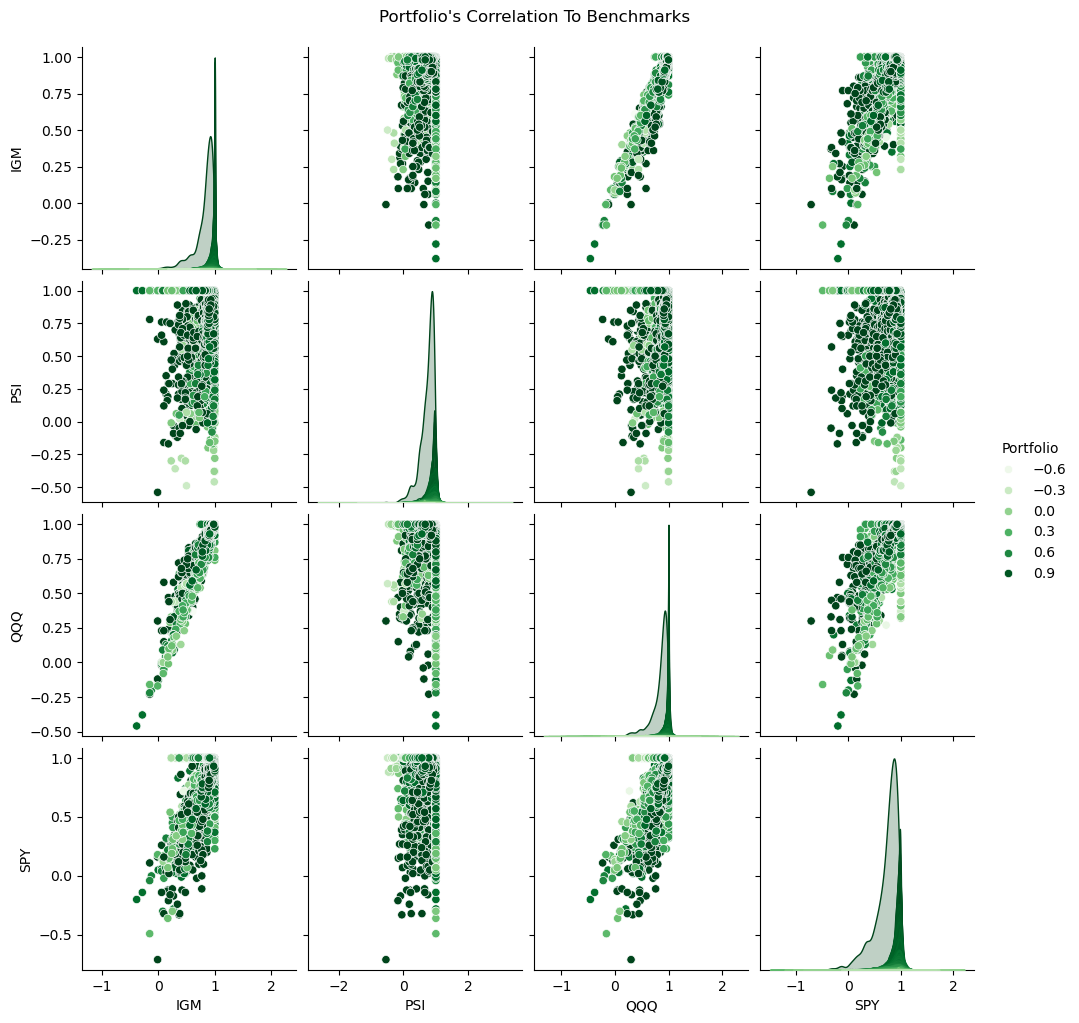

In [240]:
user_correlation_scatter_chart = CanaryFinancialCalculations.correlation_scatter_chart(user_rolling_correlation)
user_correlation_scatter_chart

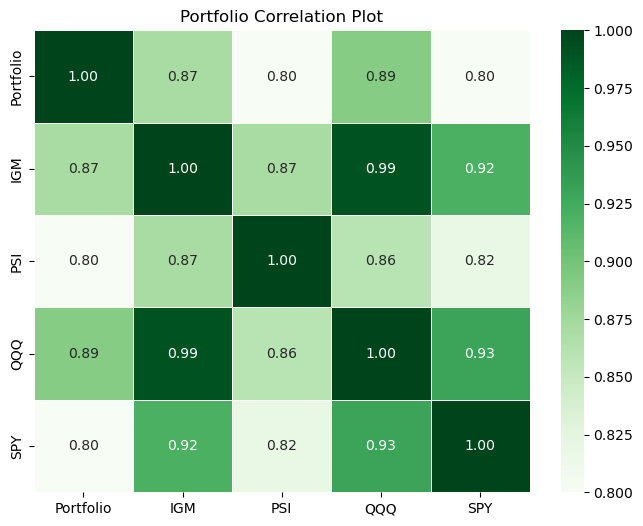

In [241]:
user_correlation_heatmap = CanaryFinancialCalculations.correlation_heatmap(user_correlation)
user_correlation_heatmap